# Portfolio analysis
This notebook introduces the concept of portfolio-level analyses. In this notebook, the results of the asset-level analysis are translated into firm-level results which are subsequently translated into portfolio-level results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from mpl_toolkits.axes_grid1 import make_axes_locatable

from prisk.utils import extract_firms, link_basins
from prisk.portfolio import Portfolio


In [2]:
# All files for the analysis are stored on the S3 buckets instead of the random samples (these are too large and take a long time to load)
power = pd.read_excel("https://kuleuven-prisk.s3.eu-central-1.amazonaws.com/power.xlsx")
hybas_basins = "https://kuleuven-prisk.s3.eu-central-1.amazonaws.com/hybas_as_lev06_v1c.shp"
basin_outlet_file = "https://kuleuven-prisk.s3.eu-central-1.amazonaws.com/lev06_outlets_final_clipped_Thailand_no_duplicates.csv"

##### Extracting Agents
The P-RISK model is based on asset-level analyses that are subsequently translated into firm- and portfolio-level impacts. To extract the firms from the Global Energy Monitor database, we use a utility function. If this approach is applied on a different dataset, then the extract_firms function needs to be replaced. We assume flood protection levels (consistent with other literature).

We limit the analysis to a single country.

In [3]:
india = power[power["Country"] == "Thailand"].copy().reset_index(drop=True).drop(columns=[2])
firms = extract_firms(india)

##### Portfolio construction
The portfolio consists of the firms linked to the assets located in Thailand. We assume an equal weighted portfolio:

In [4]:
portfolio = Portfolio("Thailand power assets")
nav = 1
for firm in firms:
    portfolio.add_position(firm, nav/(len(firms)*firm.npv))                    

In [5]:
india, basins = link_basins(india, hybas_basins, basin_outlet_file, visualize=False)

/Users/rubenkerkhofs/Documents/Oxford/PRISK/.env/lib/python3.10/site-packages/pyogrio/raw.py:196: RuntimeWarning: HTTP response code on https://kuleuven-prisk.s3.eu-central-1.amazonaws.com/hybas_as_lev06_v1c.CPG: 403
  return ogr_read(
/Users/rubenkerkhofs/Documents/Oxford/PRISK/src/prisk/utils.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4060018230' '4060018080' '4060018080' '4060018080' '4060018230'
 '4060018360' '4060018080' '4060018280' '4060018080' '4061120970' <NA>
 '4060018080' '4060018230' '4060018330' '4060018230' '4060018240'
 '4061104190' '4060019420' '4060018230' '4060018230' '4061096750'
 '4060018970' '4060021590' '4060018280' '4060018280' '4060018280'
 '4060018360' '4060018990' '4061120980' '4060018230' '4060018080'
 '4061120980' '4060018080' '4060018080' '4060018080' '4060018080'
 '4060018360' '4060018080' '4060018080' '4060018080' '4060018080'
 '4060018080' '4060018080' '4060018230' '4061

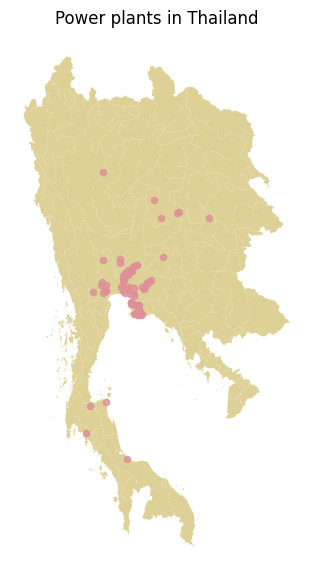

In [7]:
font_man = font_manager.FontProperties(family='Times New Roman',
                                   style='normal', size=12)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
divider = make_axes_locatable(ax)

basins.plot(ax=ax, color="#DDD197")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

# Add geographic points
plt.scatter(india.Longitude, india.Latitude, c="#dd9097", s=20, alpha=0.8)
plt.title("Power plants in Thailand")
plt.savefig("power_plants_thailand.png", dpi=300, bbox_inches='tight', transparent=True)